In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import pickle

In [5]:
df = pickle.load(open('pkl/allyears_clean','rb'))

In [6]:
stats = pickle.load(open('pkl/player_stats','rb'))

In [7]:
stats.head()

,Player,Team,Smp,Swin,Sloss,Swl,Spct,Dmp,Dwin,Dloss,Dwl,Dpct,Twl,Trwl,Cmp,Cwin,Closs,Cwl,Cpct
0,Johnny Archer,America,30,17,13,17-13,56.67,50,27,23,27-23,54.00,5-4,1-1,91,50,41,50-41,54.95
1,Earl Strickland,America,26,14,12,14-12,53.85,36,24,12,24-12,66.67,3-2,2-0,69,43,26,43-26,62.32
2,Rodney Morris,America,18,10,8,10-8,55.56,29,12,17,12-17,41.38,3-5,2-0,57,27,30,27-30,47.37
3,Shane Van Boening,America,25,10,15,10-15,40.00,25,11,14,11-14,44.00,4-6,0-0,60,25,35,25-35,41.67
4,Corey Deuel,America,13,7,6,7-6,53.85,25,13,12,13-12,52.00,5-2,2-0,47,27,20,27-20,57.45


In [25]:
stats.sort_values(by=['Cpct','Cwin'],ascending=False).head()

,Player,Team,Smp,Swin,Sloss,Swl,Spct,Dmp,Dwin,Dloss,Dwl,Dpct,Twl,Trwl,Cmp,Cwin,Closs,Cwl,Cpct
35,Jeanette Lee,America,2,2,0,2-0,100.0,3,3,0,3-0,100.00,0-0,0-0,5,5,0,5-0,100.00
38,Vivian Villarreal,America,3,3,0,3-0,100.0,2,2,0,2-0,100.00,0-0,0-0,5,5,0,5-0,100.00
54,Albin Ouschan,Europe,3,3,0,3-0,100.0,6,5,1,5-1,83.33,1-1,0-0,11,9,2,9-2,81.82
26,C.J. Wiley,America,4,3,1,3-1,75.0,1,1,0,1-0,100.00,0-0,0-0,5,4,1,4-1,80.00
36,Gabe Owen,America,2,2,0,2-0,100.0,3,2,1,2-1,66.67,0-0,0-0,5,4,1,4-1,80.00


In [35]:
stats.index = pd.RangeIndex(start=1, stop=77, step=1)

,Player,Team,Smp,Swin,Sloss,Swl,Spct,Dmp,Dwin,Dloss,Dwl,Dpct,Twl,Trwl,Cmp,Cwin,Closs,Cwl,Cpct
1,Ralf Souquet,Europe,33,20,13,20-13,60.61,44,27,17,27-17,61.36,4-4,1-1,87,52,35,52-35,59.77
2,Johnny Archer,America,30,17,13,17-13,56.67,50,27,23,27-23,54.00,5-4,1-1,91,50,41,50-41,54.95
3,Earl Strickland,America,26,14,12,14-12,53.85,36,24,12,24-12,66.67,3-2,2-0,69,43,26,43-26,62.32
4,Mika Immonen,Europe,33,16,17,16-17,48.48,39,22,17,22-17,56.41,3-3,1-1,80,42,38,42-38,52.50
5,Niels Feijen,Europe,20,12,8,12-8,60.00,33,24,9,24-9,72.73,5-4,0-0,62,41,21,41-21,66.13
6,Rodney Morris,America,18,10,8,10-8,55.56,29,12,17,12-17,41.38,3-5,2-0,57,27,30,27-30,47.37
7,Corey Deuel,America,13,7,6,7-6,53.85,25,13,12,13-12,52.00,5-2,2-0,47,27,20,27-20,57.45
8,Rodney Morris,America,18,10,8,10-8,55.56,29,12,17,12-17,41.38,3-5,2-0,57,27,30,27-30,47.37
9,Corey Deuel,America,13,7,6,7-6,53.85,25,13,12,13-12,52.00,5-2,2-0,47,27,20,27-20,57.45


([<matplotlib.axis.XTick at 0x6d9f221b70>,
 <a list of 12 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x6d9f228278>,
 <a list of 7 Text yticklabel objects>)

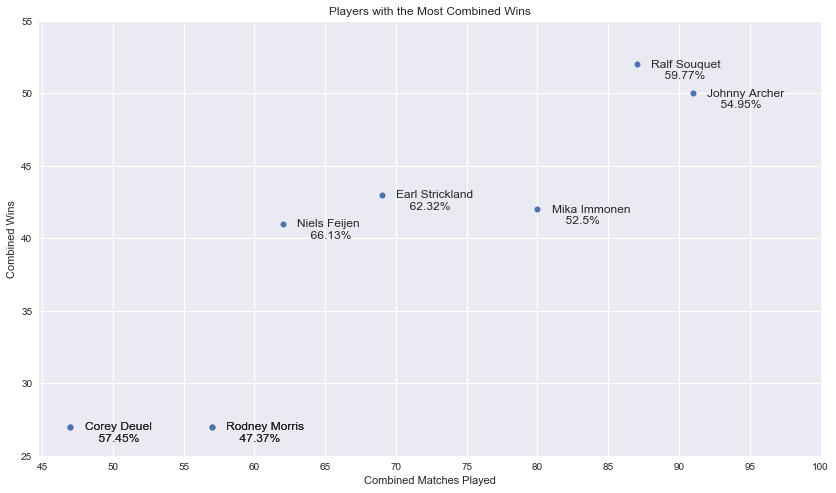

In [108]:
frame = stats.nlargest(7,'Cwin')
frame.index= pd.RangeIndex(start=1, stop=10, step=1)

from pylab import rcParams
rcParams['figure.figsize']=(14,8)

x=list(frame['Cmp'])
y=list(frame['Cwin'])
labels=list(frame['Player'])

plt.plot(x,y,linestyle='none',marker='.',markersize=12)
plt.xlabel('Combined Matches Played')
plt.ylabel('Combined Wins')
plt.title('Players with the Most Combined Wins')
plt.xticks(np.arange(45,105,5))
plt.yticks(np.arange(25,60,5))

n= list(frame['Cpct'])
for i, txt in enumerate(n):
    plt.annotate('{}\n    {}%'.format(labels[i],txt), (frame.ix[i+1,'Cmp']+1,frame.ix[i+1,'Cwin']-1))
       